# Logistic Regression

## Visualize the data

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam1', 'Exam2', 'Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [73]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
positive.head()

,Exam1,Exam2,Admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


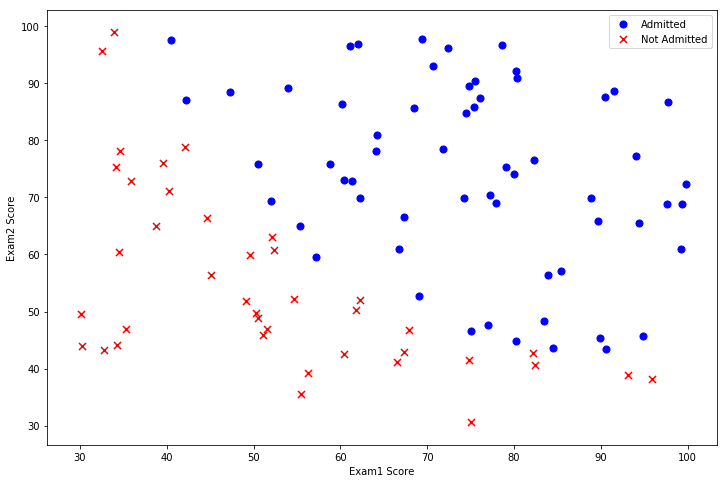

In [74]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
plt.show()

## Sigmoid Function

Hypothesis:

$h_{\theta }=g\left ( \theta^{T}x \right )$

g is sigmoid function, defined as:

$g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$

So hypothesis is:

${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$


In [75]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

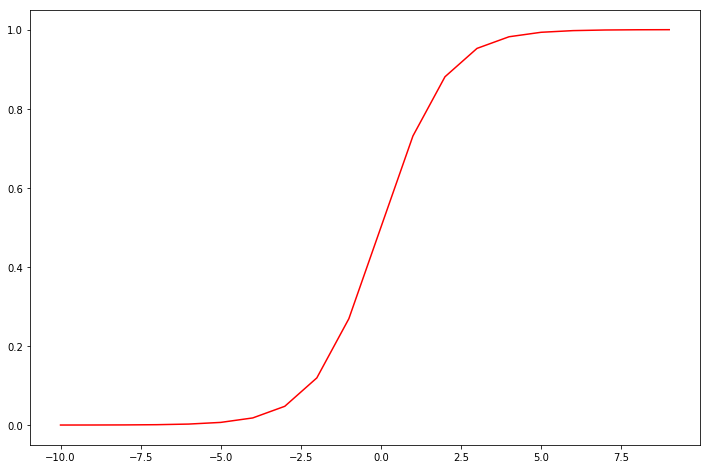

In [76]:
# plot sigmoid function.
num = np.arange(-10, 10, 1)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(num, sigmoid(num), 'r')
plt.show()

## Cost Function

Cost function in logistic regression:

$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}Cost{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right),{{y}^{(i)}} \right)}}}$

$Cost{{{\left( {{h}_{\theta }}\left( {{x}} \right),{{y}} \right)}}}=\begin{cases}
 & -\log \left( {{h}_{\theta }}\left( {{x}} \right) \right)     \text{ if } y=1 \\ 
 & -\log \left( 1 - {{h}_{\theta }}\left( {{x}} \right) \right) \text{ if } y=0 
\end{cases}$

this can be simplified to:

$Cost{{{\left( {{h}_{\theta }}\left( {{x}} \right),{{y}} \right)}}}={-{{y}}\log \left( {{h}_{\theta }}\left( {{x}} \right) \right)-\left( 1-{{y}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}} \right) \right)}$

So cost function is:

$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$



In [77]:
def compute_cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X*theta.T)))
    second = np.multiply(1-y, np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second)/len(X)

In [78]:
# add one columns.
data.insert(0, "Ones", 1)

# set X(training data)and y(target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initialize theta array.
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

X.shape, y.shape, theta.shape

((100, 3), (100, 1), (3,))

In [79]:
compute_cost(theta, X, y)

0.6931471805599453

## Gradient Descent

$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$

In [80]:
# similar as linear regression.
def gradient_descent(X, y, theta, alpha, iters):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    theta_temp = np.matrix(np.zeros(theta.shape))

    # params is number of theta
    params = theta.ravel().shape[1]

    # cost is one dimension array of size iters that stores cost value of each iteration.
    cost = np.zeros(iters)

    for i in range(iters):
        # h(x)-y is fixed in each iteration.
        error = sigmoid(X*theta.T) - y

        for j in range(params):
            # calulate sum term element
            term = np.multiply(error, X[:,j])
            # calulate new theta
            theta_temp[0,j] = theta[0,j] - (alpha/len(X))*np.sum(term)

        theta = theta_temp
        cost[i] = compute_cost(theta, X, y)

    return theta, cost

In [81]:
alpha = 0.005
iters = 5000
theta, cost = gradient_descent(X, y, theta, alpha, iters)
theta

matrix([[-1.9122372 ,  0.07524384, -0.1315243 ]])

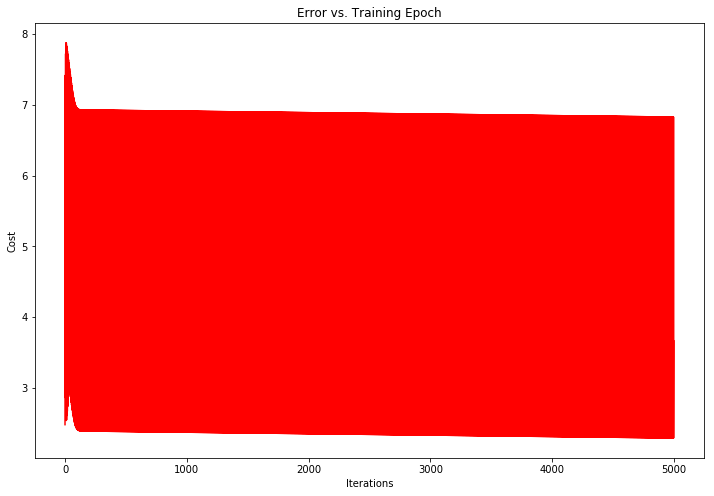

In [82]:
# plot cost decrease at each iterations
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

### It is hard to select initial theta and approriate alpha / iters to converge.

In [83]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    # params is number of theta
    params = theta.ravel().shape[1]
    grad = np.zeros(params)

    error = sigmoid(X*theta.T) - y

    for j in range(params):
        # calulate sum term element
        term = np.multiply(error, X[:,j])
        grad[j] = np.sum(term)/len(X)

    return grad

In [84]:
# check gradient when theta is zero.
theta = np.zeros(3)
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

### Use optimization to find optimal parameter(theta)

In [85]:
# need intial value of theta, function to compute cost, function to compute gradient.
import scipy.optimize as opt
# note: compute_cost and gradient function must keep parameters as theta, X, y, not X,y,theta, Why???
result = opt.fmin_tnc(func=compute_cost, x0=theta, fprime=gradient, args=(X,y))
result

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

In [86]:
compute_cost(result[0], X, y)

0.20349770158947425

### Evaluation

In [87]:
def predict(theta, X):
    probability = sigmoid(X*theta.T)
    return [1 if x > 0.5 else 0 for x in probability]

In [88]:
theta_opt = np.matrix(result[0])
prediction = predict(theta_opt, X)
correct_predict = [1 if a==b else 0 for (a,b) in zip(prediction,y)]
accuracy = sum(correct_predict)/len(correct_predict)
accuracy

0.89

# Regularized Logistic Regression

## Visualize the data

In [89]:
path = 'ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test1', 'Test2', 'Accepted'])
data2.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


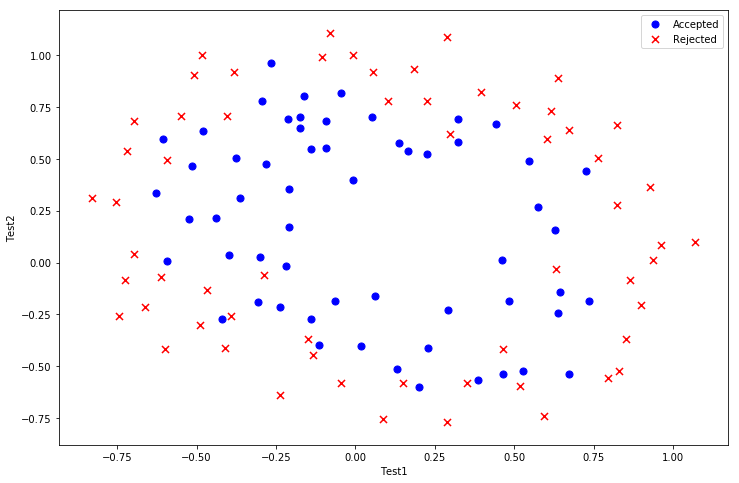

In [90]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'], positive['Test2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test1'], negative['Test2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test1')
ax.set_ylabel('Test2')
plt.show()
# linear decision boundary will not fit the data...

## Feature Mapping

In [91]:
n = 4
x1 = data2['Test1']
x2 = data2['Test2']
# now data2 has column 0(Test1),1(Test2),2(Accepted), append ones column at the end.
data2.insert(3, 'Ones', 1)
data2.head()

,Test1,Test2,Accepted,Ones
0,0.051267,0.69956,1,1
1,-0.092742,0.68494,1,1
2,-0.213710,0.69225,1,1
3,-0.375000,0.50219,1,1
4,-0.513250,0.46564,1,1


In [92]:
# generate all polynomial terms of x1 and x2.
for i in range(1, n+1):
    for j in range(0, i+1):
        data2['T'+str(i)+str(j)] = np.power(x1, i-j)*np.power(x2,j)
        
data2.head()

,Test1,Test2,Accepted,Ones,T10,T11,T20,T21,T22,T30,T31,T32,T33,T40,T41,T42,T43,T44
0,0.051267,0.69956,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,0.000007,0.000094,0.001286,0.017551,0.239497
1,-0.092742,0.68494,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,0.000074,-0.000546,0.004035,-0.029801,0.220095
2,-0.213710,0.69225,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,0.002086,-0.006757,0.021886,-0.070895,0.229642
3,-0.375000,0.50219,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,0.019775,-0.026483,0.035465,-0.047494,0.063602
4,-0.513250,0.46564,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,0.069393,-0.062956,0.057116,-0.051818,0.047011


In [93]:
# remove Test1 Test2 since it is T10 and T11 terms.
data2.drop('Test1', axis=1, inplace=True)
data2.drop('Test2', axis=1, inplace=True)
data2.head()

,Accepted,Ones,T10,T11,T20,T21,T22,T30,T31,T32,T33,T40,T41,T42,T43,T44
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,0.000007,0.000094,0.001286,0.017551,0.239497
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,0.000074,-0.000546,0.004035,-0.029801,0.220095
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,0.002086,-0.006757,0.021886,-0.070895,0.229642
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,0.019775,-0.026483,0.035465,-0.047494,0.063602
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,0.069393,-0.062956,0.057116,-0.051818,0.047011


## Regularized cost function/gradient in logistic regression

$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$

In [94]:
def compute_cost_reg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X*theta.T)))
    second = np.multiply(1-y, np.log(1-sigmoid(X*theta.T)))
    reg = learningRate/(2*len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]],2))
    return np.sum(first-second)/len(X) + reg

${{\theta }_{0}}$ should not be regualarized.

$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}},  \text for j=0$

$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\left (\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}} \right ) + \frac{\lambda }{m}{\theta }_{j},  \text for j\geq =1$

In [95]:
def gradient_reg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    # params is number of theta
    params = theta.ravel().shape[1]
    grad = np.zeros(params)

    error = sigmoid(X*theta.T) - y

    for j in range(params):
        # calulate sum term element
        term = np.multiply(error, X[:,j])
        
        if j==0:
            grad[j] = np.sum(term)/len(X)
        else:
            grad[j] = np.sum(term)/len(X) + learningRate/len(X)*theta[:,j]

    return grad

In [96]:
# set X(training data)and y(target variable)
cols2 = data2.shape[1]
X2 = data2.iloc[:,1:cols2-1]
y2 = data2.iloc[:,0:1]

# convert to numpy arrays and initialize theta array.
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(14)

learningRate = 1

cols2, X2.shape, y2.shape, theta2.shape


(16, (118, 14), (118, 1), (14,))

In [97]:
compute_cost_reg(theta2, X2, y2, learningRate)

0.6931471805599454

In [98]:
result2 = opt.fmin_tnc(func=compute_cost_reg, x0=theta2, fprime=gradient_reg, args=(X2,y2,learningRate))
result2

(array([ 1.25536712,  0.53808424,  1.08352356, -2.12775004, -0.86768664,
        -2.19883164, -0.03865601, -0.31675969, -0.33727916, -0.91073147,
        -1.64781999, -0.05377543, -0.6457359 , -0.19743773]), 24, 1)

In [99]:
compute_cost_reg(result2[0], X2, y2, learningRate)

0.558315393317796

In [100]:
theta_opt2 = np.matrix(result2[0])
prediction2 = predict(theta_opt2, X2)
correct_predict2 = [1 if a==b else 0 for (a,b) in zip(prediction2,y2)]
accuracy2 = sum(correct_predict2)/len(correct_predict2)
accuracy2

0.8135593220338984

## Plotting Decision Boundary

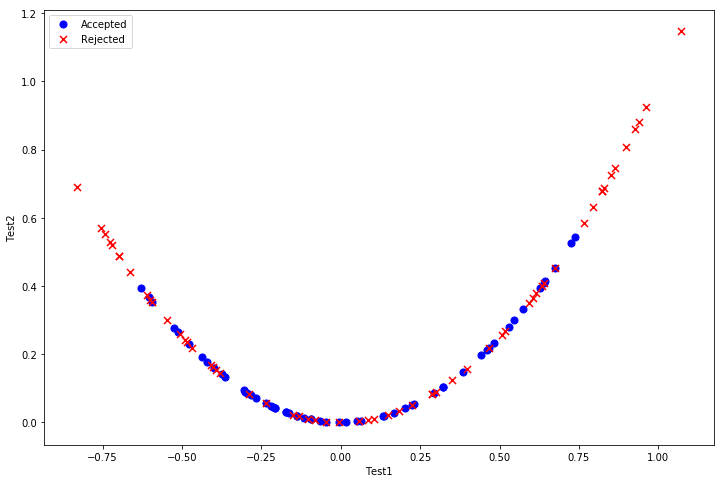

In [102]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['T10'], positive['T20'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['T10'], negative['T20'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test1')
ax.set_ylabel('Test2')
plt.show()